# MiBand-HRX
Library to work with Xiaomi MiBand HRX Edition Accelerometer Data. Intended for extraction of accelerometer data only,
for experimentaions with ROS and gesture recognition.

I couldn't find a solution that worked with MiBand HRX edition. This repo is forked from [creotiv/MiBand2](https://github.com/creotiv/MiBand2) and modified to work with HRX bands.

The following commands were helpful in identification of services and characteristics specific to HRX bands. Xiaomi doesn't provide user descriptions for the services and characteristics, which makes it harder. There are plenty of reverse engineered solutions for MiBand2 & 3 which were extremely [helpful](#sources--references).

#### List services

```sh
gatttool -b <MAC-ADDRESS> -t random --primary
```

#### List characteristics

```sh
gatttool -b <MAC-ADDRESS> -t random --characteristics
```


# BLE
- Authentication is same as MiBand2
- Services & Characteristics of interest

    - ``SERVICE_MIBAND1 : "0000fee1-0000-1000-8000-00805f9b34fb"``
        - ``CHARACTERISTIC_SENSOR_CONTROL : "00000001-0000-3512-2118-0009af100700"``
        - ``CHARACTERISTIC_SENSOR_MEASURE : "00000002-0000-3512-2118-0009af100700"``

- To receive accelerometer notification
    - Write without response ``0x010119`` to service ``0000fee1-0000-1000-8000-00805f9b34fb`` characeteristic ``00000001-0000-3512-2118-0009af100700``
    - Write without response ``0x02`` to service ``0000fee1-0000-1000-8000-00805f9b34fb`` characeteristic ``00000001-0000-3512-2118-0009af100700``
    - Write ``0x0100`` to notification descriptor to enable notification

# Processing Accelerometer Data

## Parsing
Data received in packets of byte size ``20``, ``14`` or ``8``.

Sample: ``0x0100 0500 8200 0b00 0400 8000 0b00 0300 8100 0b00``


|0100  | 0500  | 8200  | 0b00 | 0400  | 8000  | 0b00  | 0300  | 8100  | 0b00   |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| -  | signed x  |signed y   | signed z  |  signed x |  signed y | signed z  | signed x  | signed y  |  signed z |

## Calculating Roll and Pitch
In the absence of linear acceleration, the accelerometer output is a measurement of the rotated
gravitational field vector and can be used to determine the accelerometer pitch and roll orientation
angles.

<img src="roll_pitch_eqn.png" width="400">

## Plot
<img src="accel_plot.gif" width="1200">




# Sources & References
1) [Base lib provided by Leo Soares](https://github.com/leojrfs/miband2)
2) [Volodymyr Shymanskyy](https://github.com/vshymanskyy/miband2-python-test)
3) [Freeyourgadget Team](https://github.com/Freeyourgadget/Gadgetbridge/tree/master/app/src/main/java/nodomain/freeyourgadget/gadgetbridge/service/devices/huami/miband2)
4) [ragcsalo's Comment](https://github.com/Freeyourgadget/Gadgetbridge/issues/63#issuecomment-493740447)
5) [Xiaomi band protocol analyze](http://changy-.github.io/articles/xiao-mi-band-protocol-analyze.html)
6) [Tilt Sensing Using 3-Axis Accelerometer](https://www.nxp.com/docs/en/application-note/AN3461.pdf)
7) [creotiv donate link](https://github.com/creotiv/MiBand2#donate)



# Run 

1) Install dependencies
```sh
pip install -r requirements.txt
```
2) Turn on your Bluetooth
3) Unpair you MiBand from current mobile apps
4) Find out you MiBand MAC address
```sh
sudo hcitool lescan
```
5) Run this to auth device
```sh
python example.py --mac MAC_ADDRESS --init
```
6) Run this to get live accel data from the device
```sh
python example.py --live --mac MAC_ADDRESS
python example.py --help
```
7) If you having problems(BLE can glitch sometimes) try this and repeat from 4)
```sh
sudo hciconfig hci0 reset
```


<IPython.core.display.Javascript object>


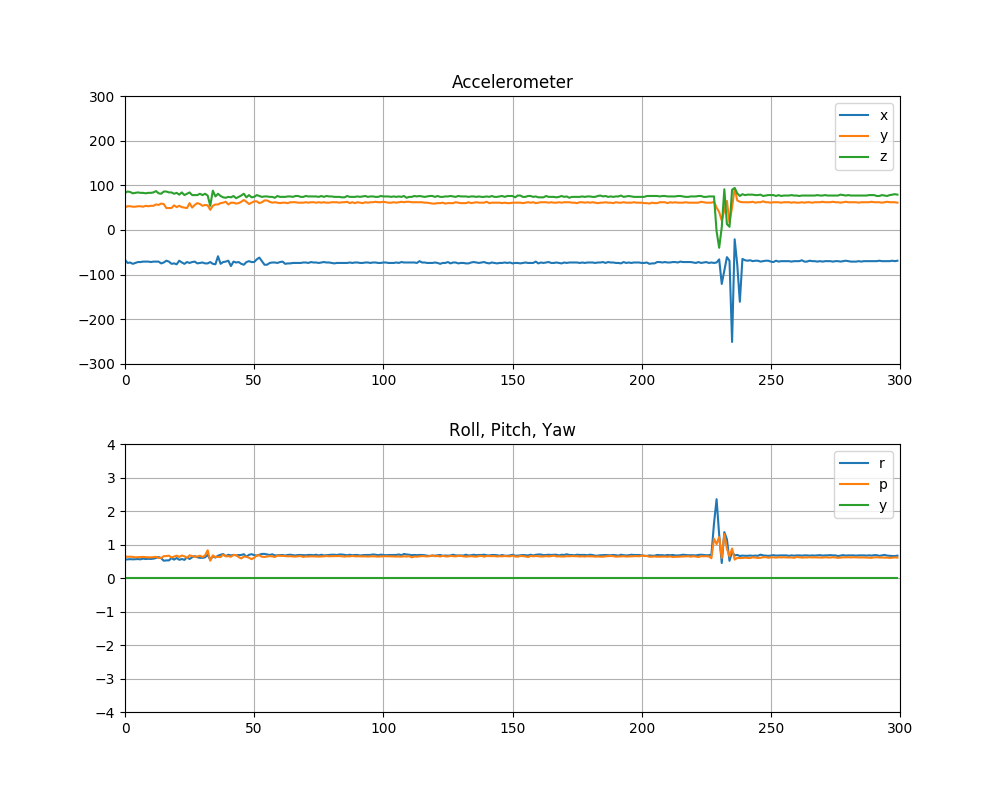

2019-09-01 08:19:56,551 MiBand2 (INFO) > Connecting to C5:64:8F:FC:47:F2
2019-09-01 08:20:04,619 MiBand2 (INFO) > Connected
2019-09-01 08:20:07,569 MiBand2 (INFO) > Enabling Auth Service notifications status...
2019-09-01 08:20:07,771 MiBand2 (INFO) > Requesting random number...
2019-09-01 08:20:08,218 MiBand2 (INFO) > Sending encrypted random number
2019-09-01 08:20:08,418 MiBand2 (INFO) > Authenticated
2019-09-01 08:20:10,718 MiBand2 (INFO) > Enabling accel raw data notification
2019-09-01 08:20:10,721 MiBand2 (INFO) > Start getting sensor data
2019-09-01 08:20:10,730 MiBand2 (INFO) > Data written to descrip.
2019-09-01 08:24:20,626 MiBand2 (INFO) > Disabling realtime accel notification
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-048a3a315d43>", line

BTLEDisconnectError: Device disconnected

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from multiprocessing import Process
import threading
import time
import sys
from base import MiBand2
from constants import ALERT_TYPES
import math
     
def plot_func():
    ax1.clear()
    ax1.set_title('Accelerometer')
    ax1.set_xlim(0,maxlen)
    ax1.set_ylim(-300,300)
    ax1.plot(t, tuple(zip(*data))[0], label="x")
    ax1.plot(t, tuple(zip(*data))[1], label="y")
    ax1.plot(t, tuple(zip(*data))[2], label="z")
    ax1.grid(True)
    ax1.legend(loc=1)
    
    
    ax2.clear()
    ax2.set_title('Roll, Pitch, Yaw')
    ax2.set_xlim(0,maxlen)
    ax2.set_ylim(-4, 4)
    ax2.plot(t, tuple(zip(*data_euler))[0], label="r")
    ax2.plot(t, tuple(zip(*data_euler))[1], label="p")
    ax2.plot(t, tuple(zip(*data_euler))[2], label="y=?")
    ax2.grid(True)
    ax2.legend(loc=1)
    
    fig.canvas.draw()
    

def accel_callback(val):
    pass

def get_euler(g):    
    gx, gy, gz = g
    roll = math.atan2(gy, gz)
    pitch = math.atan2(-gx, math.sqrt(pow(gy, 2) + pow(gz, 2)))
    return (roll, pitch, 0)

def apply_simple_low_pass(g, alpha=0.5):
    g_p = [data_lowpass[-1]] #previous value
    g_n = np.multiply(a, g) + np.multiply(1-a, g_p)
    data_lowpass.extend(tuple(g_n)) #extend new filtered vals into filter deque 
    

def start_notif():
    band.start_raw_data_realtime(accel_raw_callback=accel_callback)

def process_data():  
    while not band.is_realtime_stopped():
        g = band.get_accel()
        data.append(g)
        data_euler.append(get_euler(g))


x = y = z = 0
r = p = y = 0
maxlen = 300 
data = deque(maxlen*[(x, y, z)], maxlen=maxlen)
data_euler = deque(maxlen*[(r, p, y)], maxlen=maxlen)
data_lowpass = deque(maxlen*[(x, y, z)], maxlen=maxlen)


#fig, ax = plt.subplots()
t = [i for i in range(maxlen)]
fig,(ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.subplots_adjust(hspace=0.3)
plt.ion()
fig.show()
fig.canvas.draw()

MAC = 'C5:64:8F:FC:47:F2'
band = MiBand2(MAC, debug=True, accel_max_Q=maxlen)
band.setSecurityLevel(level="medium")
band.authenticate()   
t1 = threading.Thread(target=start_notif)
t2 = threading.Thread(target=process_data)

try:
    t1.start()
    t2.start()
    while True:
        plot_func()
        time.sleep(0.2)
except Exception as err:
    print(err)
    
finally:
    band.send_alert(ALERT_TYPES.MESSAGE)
    band.stop_realtime()
    band.disconnect()
    t1.join()
    t2.join()
    